In [1]:
# IMPORTING LIBRARIES 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = 'lightblue'

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [5]:
happy_rep=df.copy()

In [6]:
happy_rep.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
happy_rep.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [8]:
happy_rep.shape

(158, 12)

In [9]:
happy_rep.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
happy_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
happy_rep.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# By looking the info of Dataset we get to know that there is no null value and dataset contains 158 rows and 12 columns

In [12]:
happy_rep.rename(columns={'Trust (Government Corruption)':'Corruption'},inplace =True)
happy_rep.rename(columns={'Health (Life Expectancy)':'Life_Expectancy'},inplace =True)

# Plot b/w Happiness and GDp

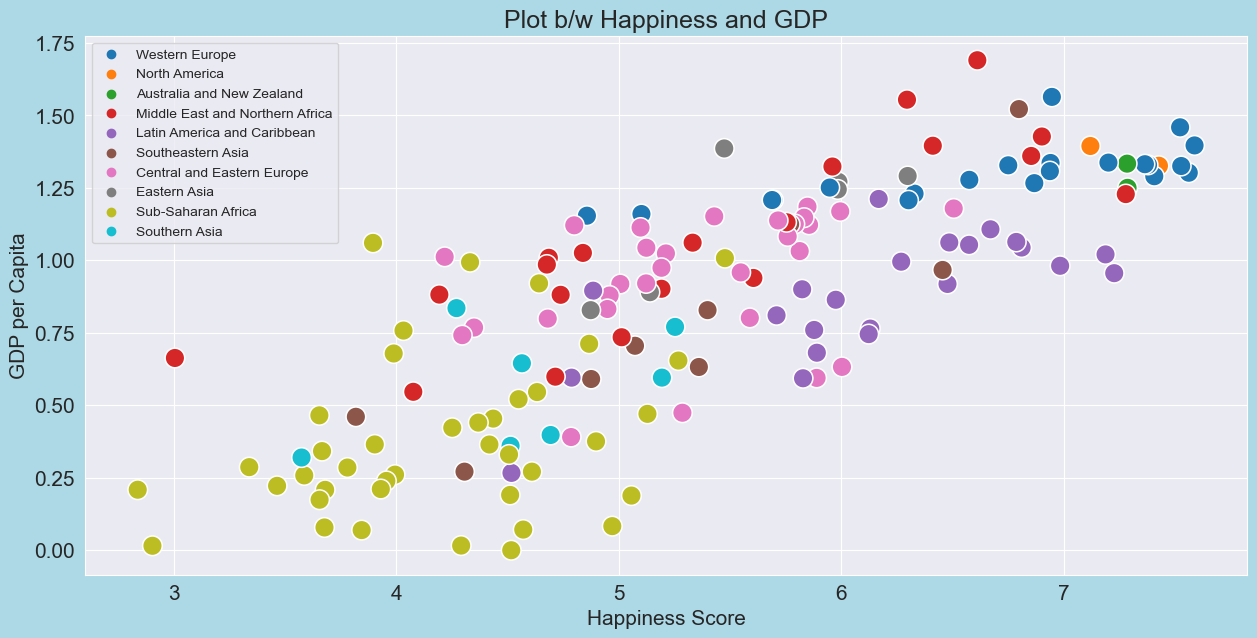

In [13]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot b/w Happiness and GDP')
sns.scatterplot(data=happy_rep,x='Happiness Score',y='Economy (GDP per Capita)',hue='Region',s=200)
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.show()

# BY looking the Scatter Plot we get to know that Region who has High GDP is also the Highest Happiness Score
# The most Happies Score of Region - Western Europe
# The Lowest Happiest Score of Region - Sub Saharan Africa & Southern Asia

In [14]:
gdp_region=happy_rep.groupby('Region')['Economy (GDP per Capita)'].sum()

In [15]:
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

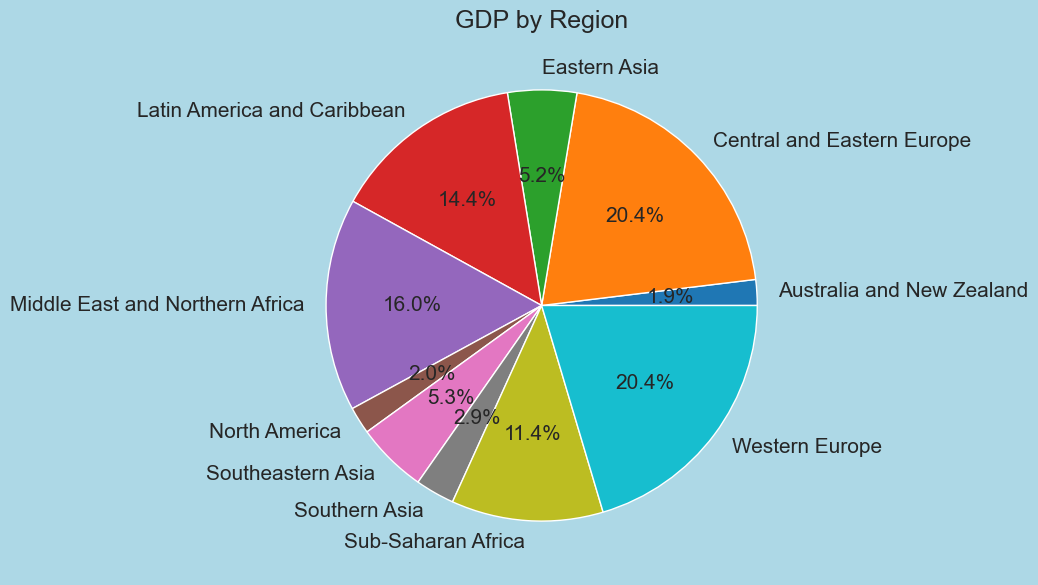

In [16]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [17]:
# Total Countries
total_country=happy_rep.groupby('Region')[('Country')].count()
print(total_country)

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Country, dtype: int64


# By looking at the Pie Chart We get to know that Western Europe, Central & Eastern Europe has the most GDP contribution then other Region
# Lowest Contribution in GDP is from North America
# The Reason behind it that Western Europe and Central & Eastern Europe region has the most no. of countries 
# lowest Number of country is in North America & Autralia and New zealand Region

In [18]:
# Corruption in Regions

corruption=happy_rep.groupby('Region')[['Corruption']].mean()
corruption

,Corruption
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


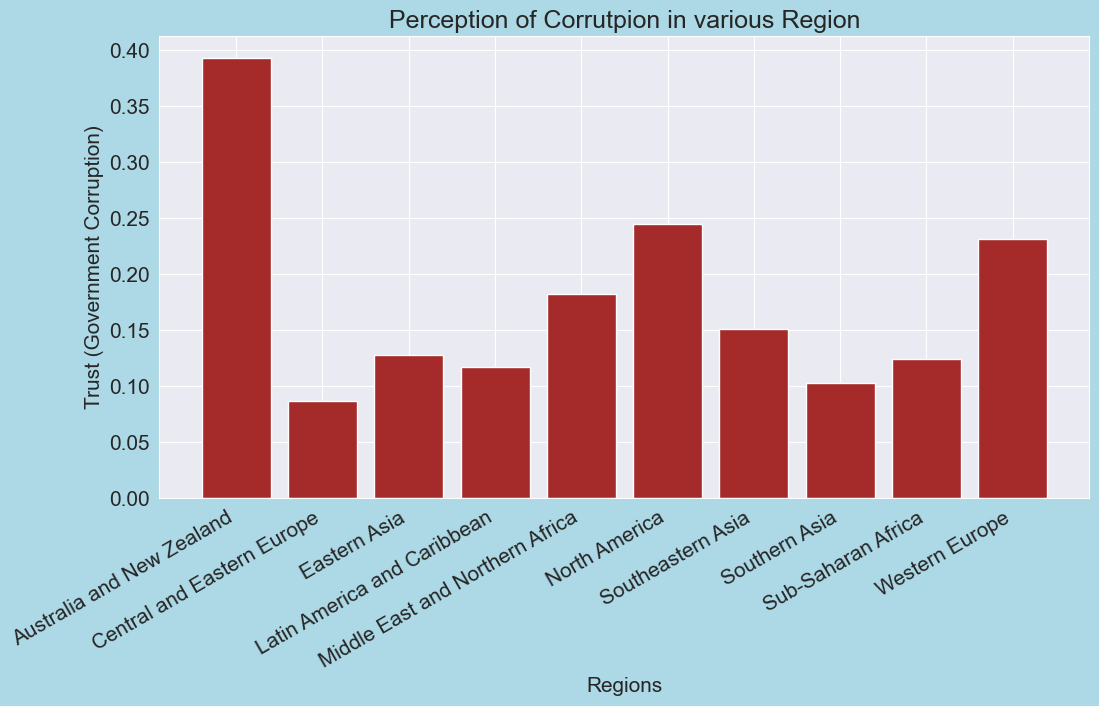

In [19]:
plt.rcParams['figure.figsize']=(12,6)
plt.title('Perception of Corrutpion in various Region')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Trust (Government Corruption)',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index,corruption.Corruption,color='brown')
plt.show()

# By Looking at Barplot the Most Corrupted Region is Australia and Newzealand

In [20]:
top_10_Happy_countries=happy_rep.head(10)
bottom_10_Happy_countries=happy_rep.tail(10)

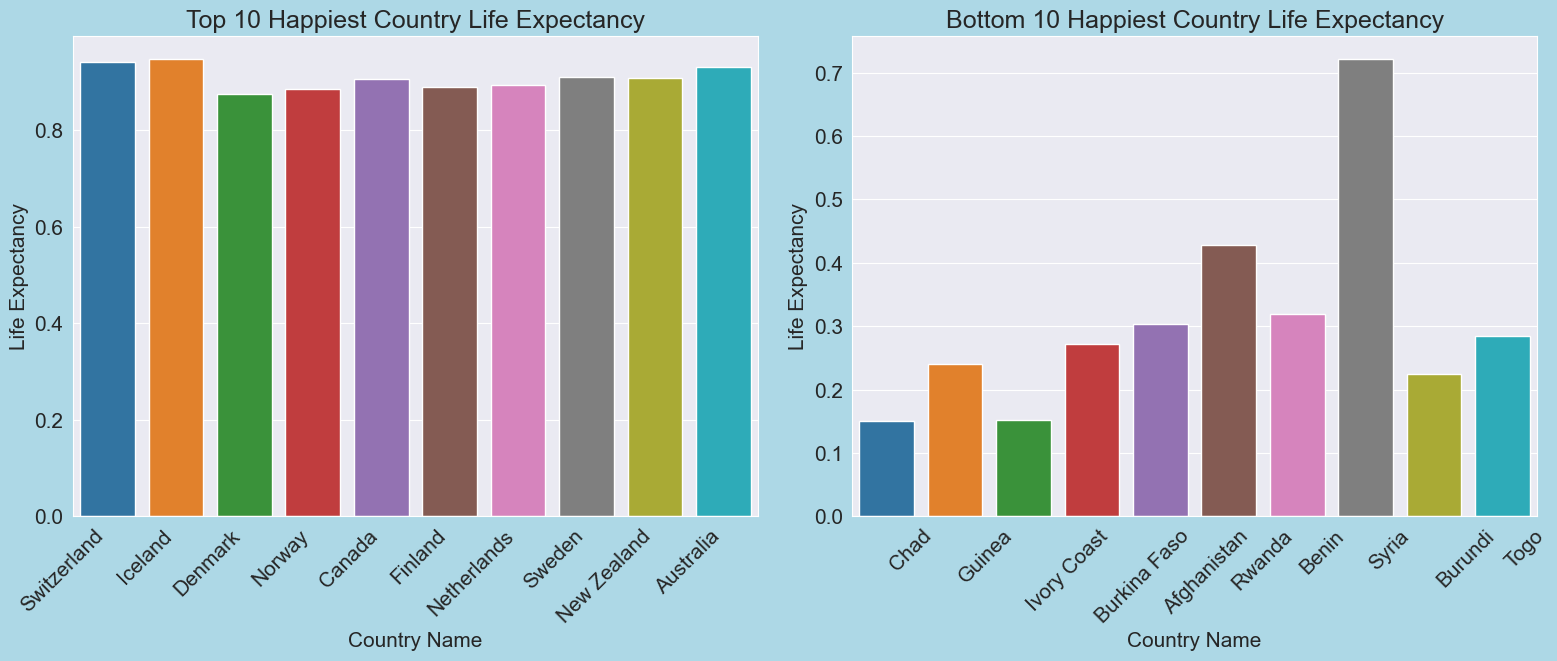

In [21]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabel=top_10_Happy_countries.Country
axes[0].set_title('Top 10 Happiest Country Life Expectancy')
axes[0].set_xticklabels(xlabel,rotation=45,ha='right')
sns.barplot(data=top_10_Happy_countries,x='Country', y='Life_Expectancy',ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabel=bottom_10_Happy_countries.Country
axes[1].set_title('Bottom 10 Happiest Country Life Expectancy')
axes[1].set_xticklabels(xlabel,rotation=45,ha='left')
sns.barplot(data=bottom_10_Happy_countries,x='Country', y='Life_Expectancy',ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')
plt.show()

# Country Who has the Top Happiest Score's Life Expectancy Rate is Highest than the lowest Happiest score' Life Expectancy

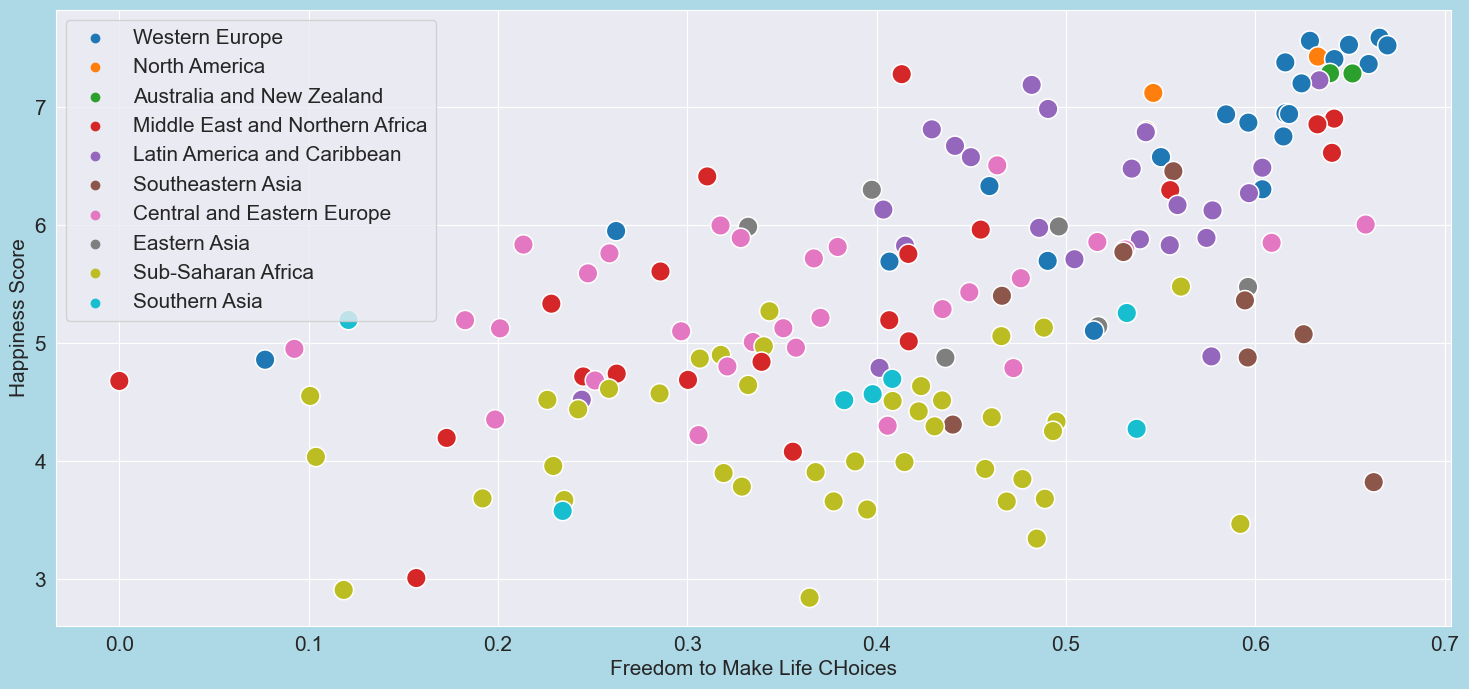

In [22]:
plt.rcParams['figure.figsize']=(18,8)
sns.scatterplot(data=happy_rep,x='Freedom',y='Happiness Score',hue='Region',s=200)
plt.legend(loc='upper left')
plt.xlabel('Freedom to Make Life CHoices')
plt.ylabel('Happiness Score')
plt.show()

# Western Europe Region's HIghest Freedom of making choices just because there happiness score is also very high
# Region whose people can choose there life choices are the happiest score always keeps high.

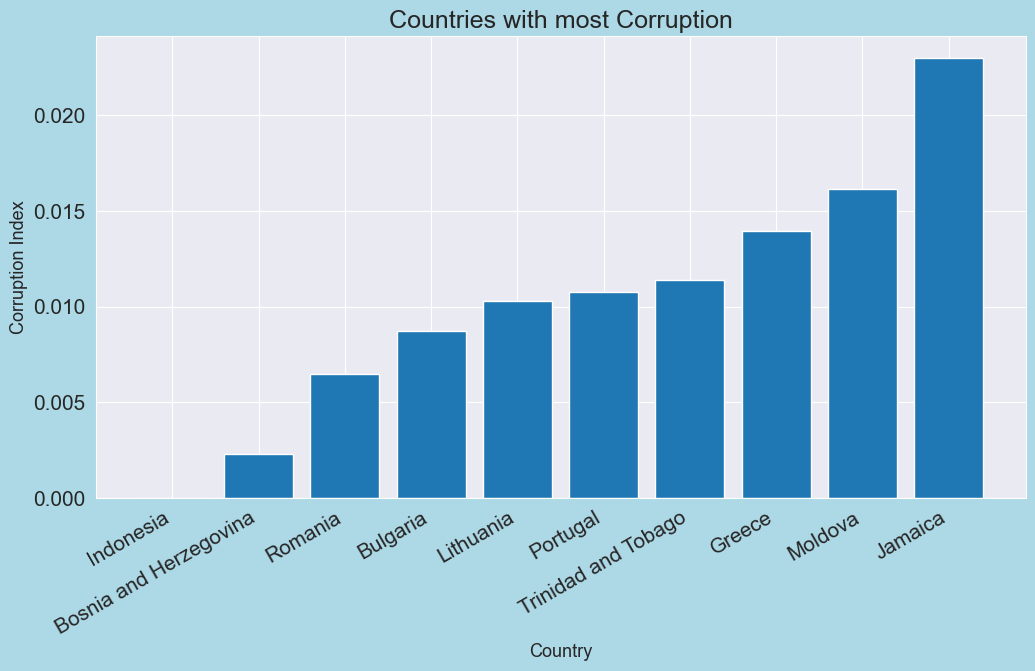

In [23]:
country=happy_rep.sort_values(by='Corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with most Corruption')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption Index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(country.Country,country.Corruption)
plt.show()

# Jamaica is the most corrupted country among all corrupted country

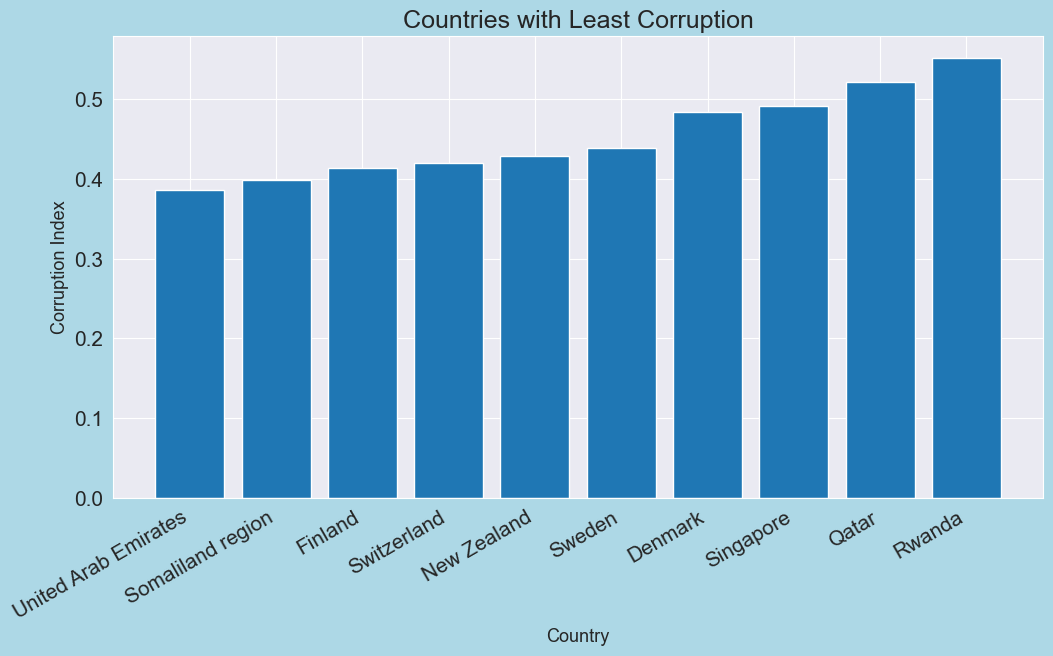

In [24]:
country=happy_rep.sort_values(by='Corruption').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with Least Corruption')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption Index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(country.Country,country.Corruption)
plt.show()

# Rwanda is most uncorrupted country among all uncorrupted country

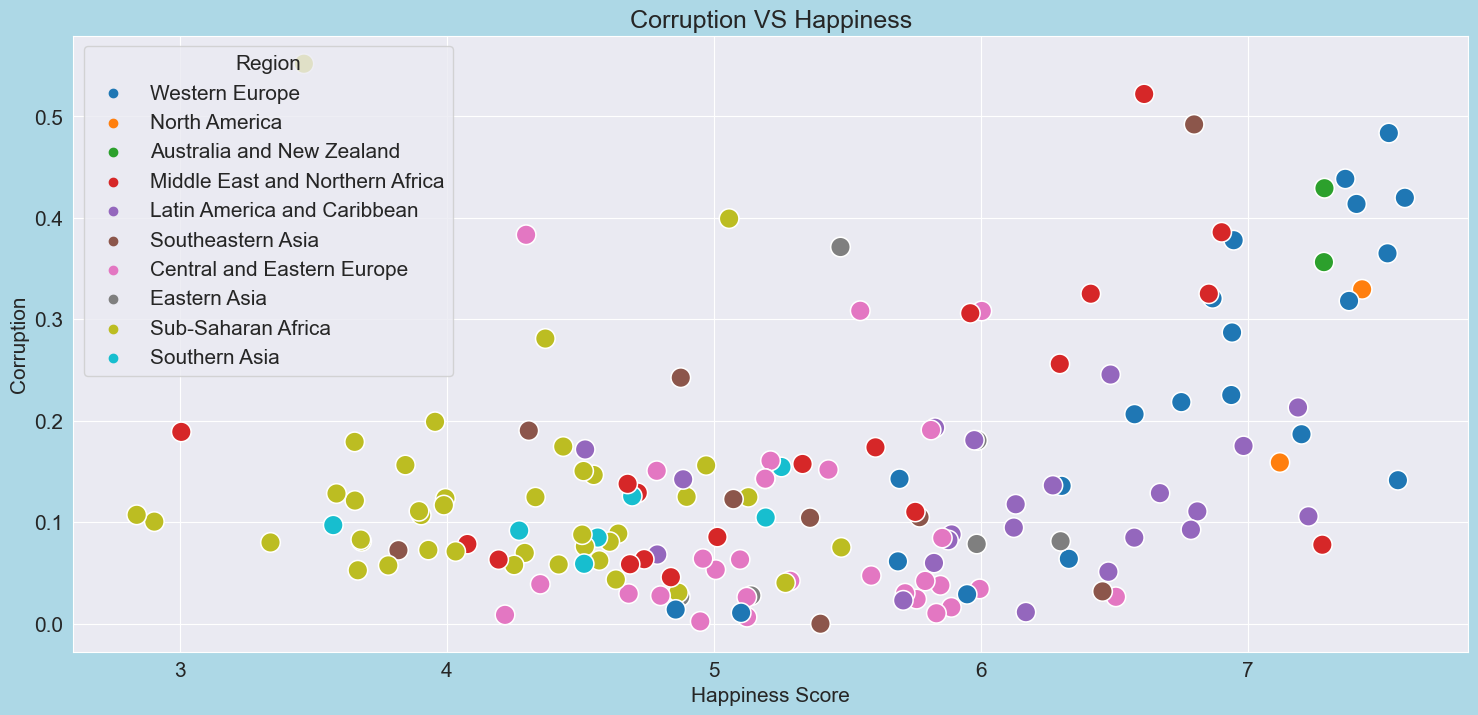

In [25]:
# Corruption VS Happiness
plt.rcParams['figure.figsize']=(18,8)
sns.scatterplot(data=happy_rep,x='Happiness Score',y='Corruption',hue="Region",s=200)
plt.xlabel("Happiness Score")
plt.ylabel("Corruption")
plt.title("Corruption VS Happiness")
plt.show()

# Country who is less corrupted is more happy and Western Europe is most happiest country by looking the ScatterPlot

# Lets Predict our Model 

In [26]:
happy_rep.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Life_Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# By looking at the statistics it looks that there is no outliers in the dataset 
# Mean amd Median of all columns looks very similar to each other 
# In Happiness Rank Columns --> Maximum and Minimum are very different but we don't need to check skewness and outliers because it is 
# count column 

# LETS SEPRATE INDEPENDENT AND DEPENDENT VARIABLE

In [27]:
happy_rep

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Life_Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [28]:
x=happy_rep.iloc[:,4:]
y=happy_rep.iloc[:,3]

In [29]:
x.shape

(158, 8)

In [30]:
y.shape

(158,)

In [31]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [32]:
#MODELLING

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
st=StandardScaler()

In [35]:
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,Standard Error,Economy (GDP per Capita),Family,Life_Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
0,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
153,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


# CHECKING VARIANCE INFLATION FACTOR(VIF)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
def calc_vif(x, column_names):
    vif = pd.DataFrame()
    vif['Variables'] = column_names
    vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [38]:
column_names = x.columns
calc_vif(x, column_names)

,Variables,VIF Factor
0,Standard Error,1.138096
1,Economy (GDP per Capita),4.106075
2,Family,1.944623
3,Life_Expectancy,3.336063
4,Freedom,1.749657
5,Corruption,1.440034
6,Generosity,1.289276
7,Dystopia Residual,1.056090


In [39]:
# IMPORTING MACHINE LEARNING LIBRARIES
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import f1_score

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=49)

In [41]:
dtr=DecisionTreeRegressor()
svr=SVR()
knr=KNeighborsRegressor()
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()

model=[dtr,svr,knr,lr,lasso,ridge]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('R_2 SCORE -',m,r2_score(y_test,predm))
    print('MEan Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean_Absolute_Squared:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

R_2 SCORE - DecisionTreeRegressor() 0.6496886964827995
MEan Absolute Error: 0.43274999999999997
Mean_Absolute_Squared: 0.4177252083333333
Root Mean Squared Error: 0.6463166471114088


R_2 SCORE - SVR() 0.9681096754341653
MEan Absolute Error: 0.1402119311781338
Mean_Absolute_Squared: 0.03802729840382336
Root Mean Squared Error: 0.1950058932540844


R_2 SCORE - KNeighborsRegressor() 0.9096302666849199
MEan Absolute Error: 0.25542916666666643
Mean_Absolute_Squared: 0.10776048416666657
Root Mean Squared Error: 0.32826892050065687


R_2 SCORE - LinearRegression() 0.9999999281231755
MEan Absolute Error: 0.00025423122249128755
Mean_Absolute_Squared: 8.570880006014886e-08
Root Mean Squared Error: 0.00029276065319668363


R_2 SCORE - Lasso() -3.2252180737213365e-05
MEan Absolute Error: 0.9037954545454546
Mean_Absolute_Squared: 1.1924784518457299
Root Mean Squared Error: 1.0920066171254321


R_2 SCORE - Ridge() 0.9999639900623835
MEan Absolute Error: 0.005444007609733709
Mean_Absolute_Squared: 4

# By Analyzing the model Ridge model is best model by looking at R-2 Score

In [42]:
from sklearn .model_selection import cross_val_score

In [43]:
model = [('dtr', dtr), ('svr', svr), ('knr', knr), ('lr', lr), ('lasso', lasso), ('ridge', ridge)]
for name, m in model:
    score = cross_val_score(m, x, y, cv=5, scoring='r2')
    print("Score for", name, score)
    print("Score_Mean -", name, score.mean())
    print("Difference between R2_Score & CV Score -", name, (r2_score(y_test, m.predict(x_test)) - score.mean()) * 100)
    print('\n')

Score for dtr [-5.64528597 -7.54970822 -6.81428006 -8.65827365 -5.13014475]
Score_Mean - dtr -6.75953852833771
Difference between R2_Score & CV Score - dtr 740.922722482051


Score for svr [-9.74629864e+00  6.77719009e-03  8.25199527e-01  3.44124295e-02
 -5.92769431e+00]
Score_Mean - svr -2.9615207611319576
Difference between R2_Score & CV Score - svr 392.9630436566123


Score for knr [-9.12505934 -2.54057731 -2.74178757 -5.33740155 -5.29181672]
Score_Mean - knr -5.007328497616674
Difference between R2_Score & CV Score - knr 591.6958764301594


Score for lr [0.99999945 0.99999834 0.99999836 0.99999535 0.99999943]
Score_Mean - lr 0.9999981871007761
Difference between R2_Score & CV Score - lr 0.0001741022399359693


Score for lasso [-39.5383371  -12.7569766   -0.20386211 -30.73906532 -23.65659767]
Score_Mean - lasso -21.378967758942114
Difference between R2_Score & CV Score - lasso 2137.8935506761377


Score for ridge [0.99561946 0.9996307  0.99955146 0.99933927 0.99810782]
Score_Mean - 

# By Analysing the Cross Val Score 'SVR' shows the Most model 
# Now we will make model by SVR(Support Vector Regressor)

In [44]:
regressor=SVR()
regressor.fit(x_train,y_train)

SVR()

In [45]:
# Prediction of Training Data
training_data_prediction=regressor.predict(x_train)

In [46]:
# R Squared Value
r2_train=r2_score(y_train,training_data_prediction)
print('R Squared Value -',r2_train)

R Squared Value - 0.9865446570460127


In [47]:
# Prediction on Test Data
test_data_prediction=regressor.predict(x_test)

In [48]:
# R Squared Value
r2_test=r2_score(y_test,test_data_prediction)
print('R Squared Value -',r2_test)

R Squared Value - 0.9681096754341653


In [49]:
happy_rep

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Life_Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [50]:
# Input data
input_data = (0.03880	,1.45900	,1.33095	,0.88521,0.66973,	0.36503	,0.34699	,2.46531)

# Changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

try:
    # Check if regressor is properly initialized and trained
    if regressor is not None:
        prediction = regressor.predict(input_data_reshaped)
        print(prediction)
    else:
        print("Regressor is not initialized or trained.")
except ValueError as e:
    print(f"Error: {e}")

[7.1753088]


In [51]:
import joblib

In [52]:
joblib.dump(prediction,'World_Happiness_Score.pkl')

['World_Happiness_Score.pkl']

# THANKYOU